In [ ]:
pip install reverse_geocoder

In [ ]:
#Libraries 
import pandas as pd
import reverse_geocoder as rg
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading file
df = pd.read_csv('/content/database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Basic Preprocesssing

In [ ]:
# Checking for null values
df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [ ]:
#Dropping columns not important for analysis
df.drop(['Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
         'Horizontal Error', 'Root Mean Square','Depth Error', 'Depth Seismic Stations', 'Source', 'Location Source', 
         'Magnitude Source', 'Status'], inplace = True, axis =1)

In [ ]:
#Description of the dataset
df.describe()

,Latitude,Longitude,Depth,Magnitude
count,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531
std,30.113183,125.511959,122.651898,0.423066
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.653000,-76.349750,14.522500,5.600000
50%,-3.568500,103.982000,33.000000,5.700000
75%,26.190750,145.026250,54.000000,6.000000
max,86.005000,179.998000,700.000000,9.100000


In [ ]:
#Checking for different categorical values of 'Type' column
df['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [ ]:
#Deleting all other entries except 'Earthquake'
filt = (df['Type'] == 'Earthquake')
df = df[filt]
df.drop(['Type'], axis =1, inplace = True)
df.reset_index(drop = True, inplace =True)

# Reverse Geocoding

In [ ]:
#Python3 program for reverse geocoding
def convert_to_country(df):
  for index, row in df.iterrows():
      coordinates = (row['Latitude'], row['Longitude'])
      result = rg.search(coordinates)  
      df.at[index, 'Country'] = result[0]['cc'] # Using only cc (Country code) 
  return df   

In [ ]:
# This is a lenghty process, can even take an hour
df = convert_to_country(df)

Loading formatted geocoded file...


In [ ]:
df2 = pd.read_csv('/content/Country_codes.csv')
df2.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [ ]:
df = pd.merge(df, df2, left_on ="Country", right_on = "Code")
df.drop(['Code'], axis =1, inplace = True)
#df.drop(['Name_x'], axis =1, inplace = True)

In [ ]:
df.to_csv('Locations.csv', index = False)

In [ ]:
df = pd.read_csv('/content/Locations.csv')
df.drop(['Name_x'], axis =1, inplace = True)
df.rename(columns = {'Name_y': 'Name'}, inplace = True)
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,ID,Country,Name
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,ISCGEM860706,MP,Northern Mariana Islands
1,02/17/1965,18:23:57,21.527,143.081,340.0,5.6,ISCGEM860296,MP,Northern Mariana Islands
2,04/25/1965,01:00:15,24.409,142.776,30.0,6.0,ISCGEM858003,MP,Northern Mariana Islands
3,02/10/1966,14:21:13,20.711,146.163,45.7,6.5,ISCGEM850077,MP,Northern Mariana Islands
4,03/29/1966,02:17:40,23.869,142.248,80.0,6.0,ISCGEM849682,MP,Northern Mariana Islands


**1. PLOTTING EARTHQUAKE MAGNITUDE**

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_distplot([df['Magnitude']], ['Earthquake Magnitude'])
fig.show()

**2. GETTING MONTH COLUMN USING DATE AND TIME**

In [ ]:
df['DateTime'] = df['Date'] + " " + df['Time']

In [ ]:
# These rows didn't have date and time in correct format
df.drop([5956, 12450, 13192], axis =0, inplace = True)
df.reset_index(drop = True, inplace =True)

In [ ]:
# Python program to create MONTH column
import datetime
def month(df):
    for index, row in df.iterrows():
        datem = datetime.datetime.strptime(row['DateTime'], "%m/%d/%Y %H:%M:%S")
        df.at[index, 'Month'] = datem.strftime("%B")
    return df

In [ ]:
df= month(df)
df.tail()

,Date,Time,Latitude,Longitude,Depth,Magnitude,ID,Country,Name,DateTime,Month
23224,01/12/2010,22:12:05,18.452,-72.513,10.0,5.7,USP000H60N,HT,Haiti,01/12/2010 22:12:05,January
23225,01/13/2010,01:32:44,18.420,-72.861,10.0,5.6,USP000H61B,HT,Haiti,01/13/2010 01:32:44,January
23226,01/13/2010,01:36:31,18.404,-72.826,10.0,5.6,USP000H61C,HT,Haiti,01/13/2010 01:36:31,January
23227,01/13/2010,05:02:57,18.367,-72.903,10.0,5.8,USP000H61Z,HT,Haiti,01/13/2010 05:02:57,January
23228,01/20/2010,11:03:43,18.423,-72.823,10.5,5.9,USP000H6D2,HT,Haiti,01/20/2010 11:03:43,January


In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Month")
fig.show()

**3. ARE EARTHQUAKES INCREASING WITH TIME?**

In [ ]:
# Having same date and time is a rare event, it only happens if the same earthquake is reported at different centres 
# near the site where earthquake happened. For example, if EQ happended in Japan and same time (datetime) at a very 
# near by location it means we are talking of same EQ only so the information is redundant 

df.drop_duplicates(subset='DateTime', keep='last', inplace=True)
df.reset_index(drop= True, inplace = True)

In [ ]:
# Changing data type from str to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
# Plotting Year vs Earthquake graph
Year = [x for x in range(1965,2017,1)]
Earthquake_count = df.groupby(pd.Grouper(key='DateTime', freq='Y')).count()['ID'].values
fig = px.line(x= Year, y= Earthquake_count, title='Earthquake vs Year Plot', labels = {'x':'Year', 'y':'Earthquake Count'})
fig.show()

**4. IS THERE INCREASE IN HIGH MAGNITUDE EARTHQUAKES AS WELL?**

In [ ]:
df_low = df.query('Magnitude < 7')
df_high = df.query('Magnitude >= 7 and Magnitude <7.9')
df_severe = df.query('Magnitude >= 7.9')

In [ ]:
X1 = df_low.groupby(pd.Grouper(key='DateTime', freq='Y')).count()['ID'].values
X2 = df_high.groupby(pd.Grouper(key='DateTime', freq='Y')).count()['ID'].values
X3 = df_severe.groupby(pd.Grouper(key='DateTime', freq='Y')).count()['ID'].values

In [ ]:
X1

array([321, 224, 244, 281, 308, 327, 366, 372, 385, 344, 388, 433, 407,
       382, 334, 327, 302, 333, 427, 451, 451, 473, 475, 468, 465, 506,
       411, 519, 452, 491, 568, 525, 439, 375, 426, 538, 427, 430, 469,
       555, 522, 497, 590, 496, 500, 535, 692, 429, 442, 468, 427, 453])

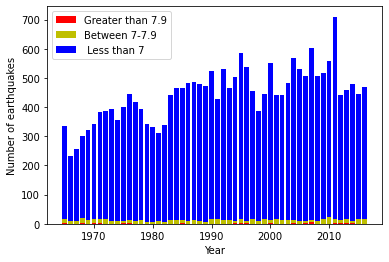

In [ ]:
# importing package
import matplotlib.pyplot as plt

# plot bars in stack manner
plt.bar(Year, X3, color='r')
plt.bar(Year, X2, bottom= X3, color='y')
plt.bar(Year, X1, bottom = X2, color = 'b')
plt.legend(['Greater than 7.9', 'Between 7-7.9', ' Less than 7'])
plt.xlabel('Year')
plt.ylabel('Number of earthquakes')
plt.show()

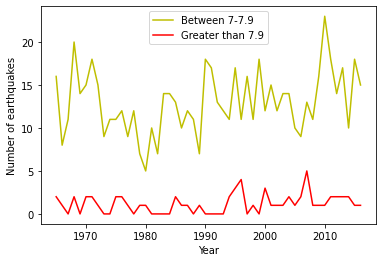

In [ ]:
# Plotting high and severe magnitude earthquakes
plt.plot(Year, X2, color ='y')
plt.plot(Year, X3, color = 'r')
plt.xlabel('Year')
plt.ylabel('Number of earthquakes')
plt.legend(['Between 7-7.9','Greater than 7.9'])

**5. WHERE DO HIGH MAGNITUDE EARTHQUAKE OCCURS?**


In [ ]:
df_not_low = df.query('Magnitude >= 6.9')
df_not_low['Country'].value_counts()

ID    109
JP     81
VU     64
TO     62
PG     60
     ... 
AG      1
DO      1
TF      1
TJ      1
HT      1
Name: Country, Length: 76, dtype: int64

**6. DEPTH OF AN EARTHQUAKE **

In [ ]:
#DEPTH OF EARTHQUAKE AND ITS SIGNIFICANCE
df.describe()['Depth']

count    23207.000000
mean        71.345961
std        122.968455
min         -1.100000
25%         15.000000
50%         33.000000
75%         54.900000
max        700.000000
Name: Depth, dtype: float64

Text(0, 0.5, 'Number of earthquakes')

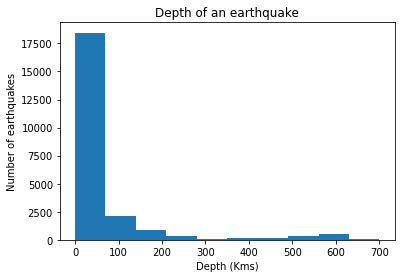

In [ ]:
plt.hist(df['Depth'],bins = [x for x in range(0,701,70)])
plt.title('Depth of an earthquake')
plt.xlabel('Depth (Kms)')
plt.ylabel('Number of earthquakes')

**7. PLOTTING GEOSPATIAL DATA**

In [ ]:
pip install keplergl

     |████████████████████████████████| 9.7 MB 5.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 36.1 MB/s 
     |████████████████████████████████| 6.3 MB 21.9 MB/s 
     |████████████████████████████████| 16.7 MB 22.3 MB/s 
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922344 sha256=1b82ee4890c7d2ca54c6533397191afaee53267f7aae3a3ad4600bc0af65c4d8
  Stored in directory: /root/.cache/pip/wheels/4b/19/e5/0852b7888ee350e9c57087ccc61eeab9daf50f5caac9c690ec
Successfully built keplergl


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from keplergl import KeplerGl
map_1 = KeplerGl(height = 600)
map_1.add_data(data=df, name = 'Earthquakes Visualization')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [ ]:
map_1

In [ ]:
# In order to save it to html, we need to change datatype back to string format
df['DateTime'] = df['DateTime'].astype(str)

In [ ]:
map_1.save_to_html(file_name= 'Heatmap_Earthquakes.html')